In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/bank-additional-full.csv",sep=";")

In [ ]:
data.info()

In [ ]:
cat_feat = data.select_dtypes(include=["object"]).columns

for label, content in data[cat_feat].items():
  print('{0}:{1}'.format(label,content.unique()))

job:['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital:['married' 'single' 'divorced' 'unknown']
education:['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default:['no' 'unknown' 'yes']
housing:['no' 'yes' 'unknown']
loan:['no' 'yes' 'unknown']
contact:['telephone' 'cellular']
month:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week:['mon' 'tue' 'wed' 'thu' 'fri']
poutcome:['nonexistent' 'failure' 'success']
y:['no' 'yes']


In [ ]:
train = data.sample(frac=0.8,random_state=123)
test = data.drop(train.index).sample(frac=1.0)

In [ ]:
target_column = "y"

x_train = train.drop(columns=target_column)
y_train = train[target_column]

In [ ]:
from sklearn.pipeline import Pipeline #ES EL NORMAL
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

Onehot_feat = ['job','marital','education','default','housing','loan','contact','poutcome']
Num_feat = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [ ]:
from imblearn.pipeline import Pipeline

ohe_pipe = Pipeline([
                     ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
                     ('encoder',OneHotEncoder(handle_unknown='ignore',sparse=False))
])

num_pipe = Pipeline([
                     ('imputer',SimpleImputer(strategy='median')),
                     ('scaler',MinMaxScaler())
])

preprocessor = ColumnTransformer([
                     ('ohe',ohe_pipe,Onehot_feat),
                     ('num',num_pipe,Num_feat)
])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

modelo = Pipeline([
                   ('preprocessor',preprocessor),
                   ('balanceo',SMOTE()),
                   ('pca',PCA(n_components=5)),
                   ('modelo',LogisticRegression(max_iter=1000))
])


In [ ]:
modelo.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('n

In [ ]:
modelo.score(x_train,y_train)

0.7219423368740516

In [ ]:
target_column = "y"

x_test = test.drop(columns=target_column)
y_test = test[target_column]

y_pred = modelo.predict(x_test)

modelo.score(x_test,y_test)

0.7324593347899976

0.37845459672870846


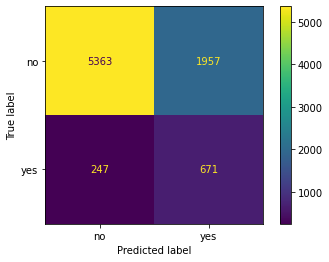

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

cm = confusion_matrix(y_test,y_pred)
print(f1_score(y_test,y_pred,pos_label='yes'))
ConfusionMatrixDisplay(cm, display_labels=modelo.classes_).plot()